In [115]:
# Importing used modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [141]:
# Importing data and cleaning it up
df = pd.read_csv('../ML-Cancer-SCC-2020-21/Children\'s Oncology Group Study 9906 for High-Risk Pediatric Training Stats (1).csv')
df = df.drop('TRAINING OR TEST SET?', axis = 1)
df = df.drop("Sample", axis =1)
dummies = pd.get_dummies(df['CONGENITAL ABNORMALITY'], drop_first = True, prefix= "CONGENITAL ABNORMALITY")
df = pd.concat([df.drop('CONGENITAL ABNORMALITY', axis=1), dummies], axis=1)
dummies = pd.get_dummies(df['CNS STATUS'], drop_first = True, prefix= "CNS STATUS")
df = pd.concat([df.drop('CNS STATUS', axis=1), dummies], axis=1)
dummies = pd.get_dummies(df['TESTICULAR INVOLVEMENT'], drop_first = True, prefix= "TESTICULAR INVOLVEMENT")
df = pd.concat([df.drop('TESTICULAR INVOLVEMENT', axis=1), dummies], axis=1)
dummies = pd.get_dummies(df['GENDER'], drop_first = True, prefix= "GENDER")
df = pd.concat([df.drop('GENDER', axis=1), dummies], axis=1)
dummies = pd.get_dummies(df['E2A-PBX, T(1;19)'], drop_first = True, prefix= "E2A-PBX, T(1;19)")
df = pd.concat([df.drop('E2A-PBX, T(1;19)', axis=1), dummies], axis=1)
df = df.drop("BCR-ABL, T(9;22)", axis =1)
dummies = pd.get_dummies(df['TEL-AML,T(12;21)'], drop_first = True, prefix= "TEL-AML,T(12;21)")
df = pd.concat([df.drop('TEL-AML,T(12;21)', axis=1), dummies], axis=1)
dummies = pd.get_dummies(df['MLL'], drop_first = True, prefix= "MLL")
df = pd.concat([df.drop('MLL', axis=1), dummies], axis=1)
dummies = pd.get_dummies(df['TISSUE TYPE'], drop_first = True, prefix= "TISSUE TYPE")
df = pd.concat([df.drop('TISSUE TYPE', axis=1), dummies], axis=1)
dummies = pd.get_dummies(df['RACE'], drop_first = True, prefix= "RACE")
df = pd.concat([df.drop('RACE', axis=1), dummies], axis=1)
dummies = pd.get_dummies(df['TRISOMY 4 AND 10'], drop_first = True, prefix= "TRISOMY 4 AND 10")
df = pd.concat([df.drop('TRISOMY 4 AND 10', axis=1), dummies], axis=1)

In [142]:
df.head()

,CONGENITAL ABNORMALITY,CNS STATUS,TESTICULAR INVOLVEMENT,GENDER,AMPLIFICATION SET,"E2A-PBX, T(1;19)","BCR-ABL, T(9;22)","TEL-AML,T(12;21)",HYBRIDIZATION SET,"BLAST COUNT, % OF SAMPLE, -1=UNAVAILABLE",MLL,"SAMPLE VIABILITY, % OF SAMPLE, -1=UNAVAILABLE",TISSUE TYPE,AGE IN DAYS AT DIAGNOSIS,"WBC, 1000/MICROLITER",RACE,TRISOMY 4 AND 10
0,Unknown,No CNS disease,Negative,Male,10,Negative,Negative,Negative,18,90,Negative,66,bone marrow,5349,147.6,Hispanic or Latino,Negative
1,Unknown,No CNS disease,Negative,Male,9,Negative,Negative,Negative,16,95,Negative,85,bone marrow,4918,5.5,White,Negative
2,Unknown,No CNS disease,Negative,Male,9,Negative,Negative,Negative,16,95,Negative,88,bone marrow,5857,13.3,White,Negative
3,None,No CNS disease,Negative,Male,9,Negative,Negative,Negative,16,-1,Negative,46,peripheral blood,713,110.3,White,Negative
4,None,No CNS disease,Negative,Male,9,Negative,Negative,Negative,16,90,Negative,98,bone marrow,5183,23.0,Black or African American,Negative


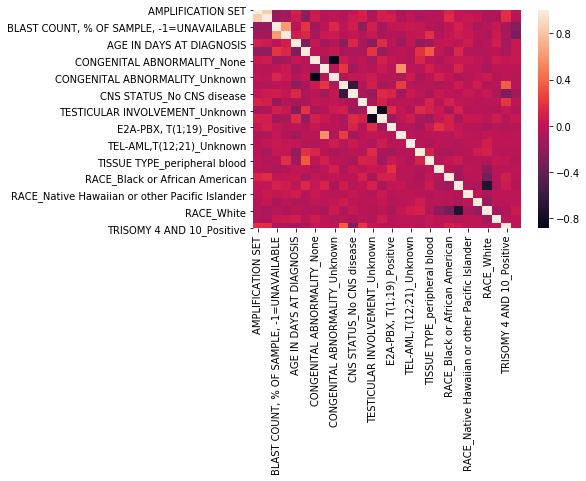

In [140]:
sns.heatmap(df.corr())

In [135]:
len(df.columns)

28